In [1]:
# Python imports and constants

%load_ext autoreload
%autoreload 2

import datetime
import db_dtypes
import pandas as pd
import numpy as np

from nooda.chart import ops, agg, fonts
from dateutil.relativedelta import relativedelta

fonts.jakarta_sans()


# Example notebook

This is an example of how you can use the different chartlib charts.

## Ops chart

In [2]:
def data():
    data = pd.DataFrame(
        data={
            "day": pd.date_range(start="2021-07-01", end="2023-07-09", freq="D"),
        }
    )
    data["num_valid"] = np.random.randint(10000, 100000, data.shape[0])
    data["num_errors"] = np.random.randint(100, 1000, data.shape[0])
    data["total_num"] = data["num_valid"] + data["num_errors"]
    data["target"] = 0.98

    data.set_index("day", inplace=True)

    return data

df = data()

In [3]:
success_columns = ["num_valid", "total_num"]
success_ratio = agg.ratio(*success_columns)

success_series = ops.Series(
    success_columns,
    label="Success %",
    agg=success_ratio,
    style=ops.SeriesStyle(markersize=4),
    annotations=ops.AnnotationStyle(),
)
success_yoy_series = ops.Series(
    success_columns,
    label="Success % (YoY)",
    agg=success_ratio,
    offset=relativedelta(months=12),
    style=ops.SeriesStyle(markersize=4, alpha=0.4),
)
target_series = ops.Series(
    "target",
    label="Target",
    agg=max,
    style=ops.SeriesStyle(color="green"),
)

chart = ops.Chart(
    title="Uswitch reliability",
    formatter="{x:.3%}",
    plots=[
        ops.Daily(series=[success_series, target_series], days=7),
        ops.Weekly(series=[success_series, target_series], weeks=6),
        ops.Monthly(
            series=[success_series, target_series, success_yoy_series],
            months=12
        ),
    ],
)

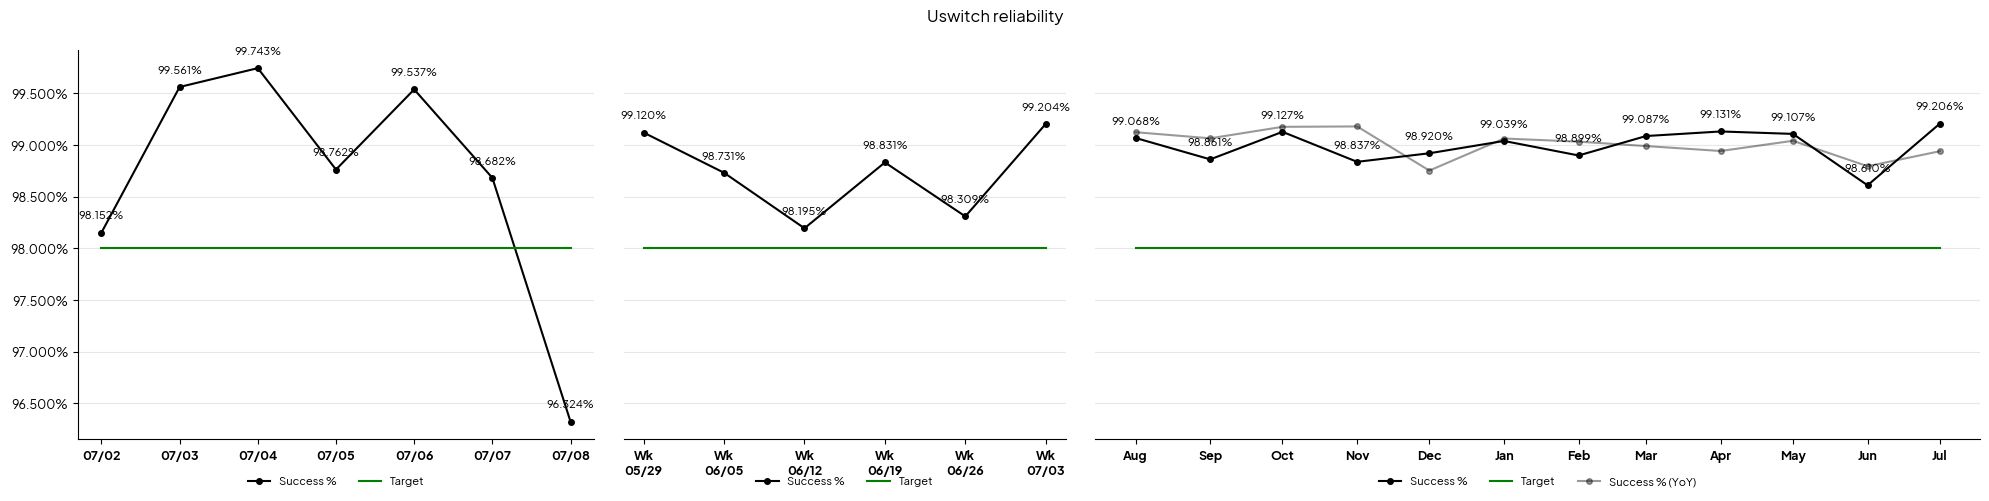

In [4]:
fig = chart.plot(df)

In [5]:
(daily_data, weekly_data, monthly_data) = chart.data(df)
(daily_data, weekly_data, monthly_data)

(            Success %  Target
 day                          
 2023-07-02   0.981521    0.98
 2023-07-03   0.995609    0.98
 2023-07-04   0.997430    0.98
 2023-07-05   0.987623    0.98
 2023-07-06   0.995372    0.98
 2023-07-07   0.986820    0.98
 2023-07-08   0.963243    0.98,
             Success %  Target
 day                          
 2023-05-29   0.991201    0.98
 2023-06-05   0.987313    0.98
 2023-06-12   0.981946    0.98
 2023-06-19   0.988313    0.98
 2023-06-26   0.983093    0.98
 2023-07-03   0.992039    0.98,
             Success %  Target  Success % (YoY)
 2022-08-01   0.990678    0.98         0.991237
 2022-09-01   0.988609    0.98         0.990644
 2022-10-01   0.991273    0.98         0.991756
 2022-11-01   0.988370    0.98         0.991794
 2022-12-01   0.989199    0.98         0.987526
 2023-01-01   0.990389    0.98         0.990626
 2023-02-01   0.988985    0.98         0.990322
 2023-03-01   0.990865    0.98         0.989895
 2023-04-01   0.991307    0.98         